In [1]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import joblib

In [ ]:
# read the dataset
df = pd.read_csv("/content/customer_data.csv")
df.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [ ]:
df.shape

(1125, 13)

In [ ]:
df.nunique()

label        2
id        1125
fea_1        6
fea_2      158
fea_3        3
fea_4      229
fea_5        2
fea_6       10
fea_7       10
fea_8       52
fea_9        5
fea_10     280
fea_11     266
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [ ]:
df[df.duplicated()]

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11


In [ ]:
# Missing Value analysis
df.isna().sum()

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64

In [ ]:
df['fea_2'] = df['fea_2'].replace(np.NaN, df['fea_2'].mean())

In [ ]:
df.isna().sum()

label     0
id        0
fea_1     0
fea_2     0
fea_3     0
fea_4     0
fea_5     0
fea_6     0
fea_7     0
fea_8     0
fea_9     0
fea_10    0
fea_11    0
dtype: int64

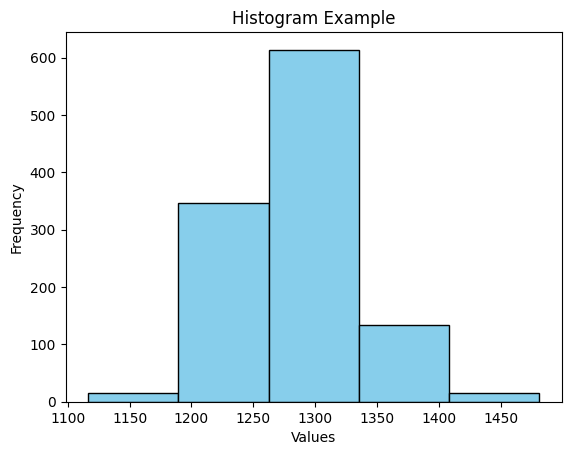

In [ ]:
data = df['fea_2']

# Create histogram
plt.hist(data, bins=5, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Example')

# Show plot
plt.show()

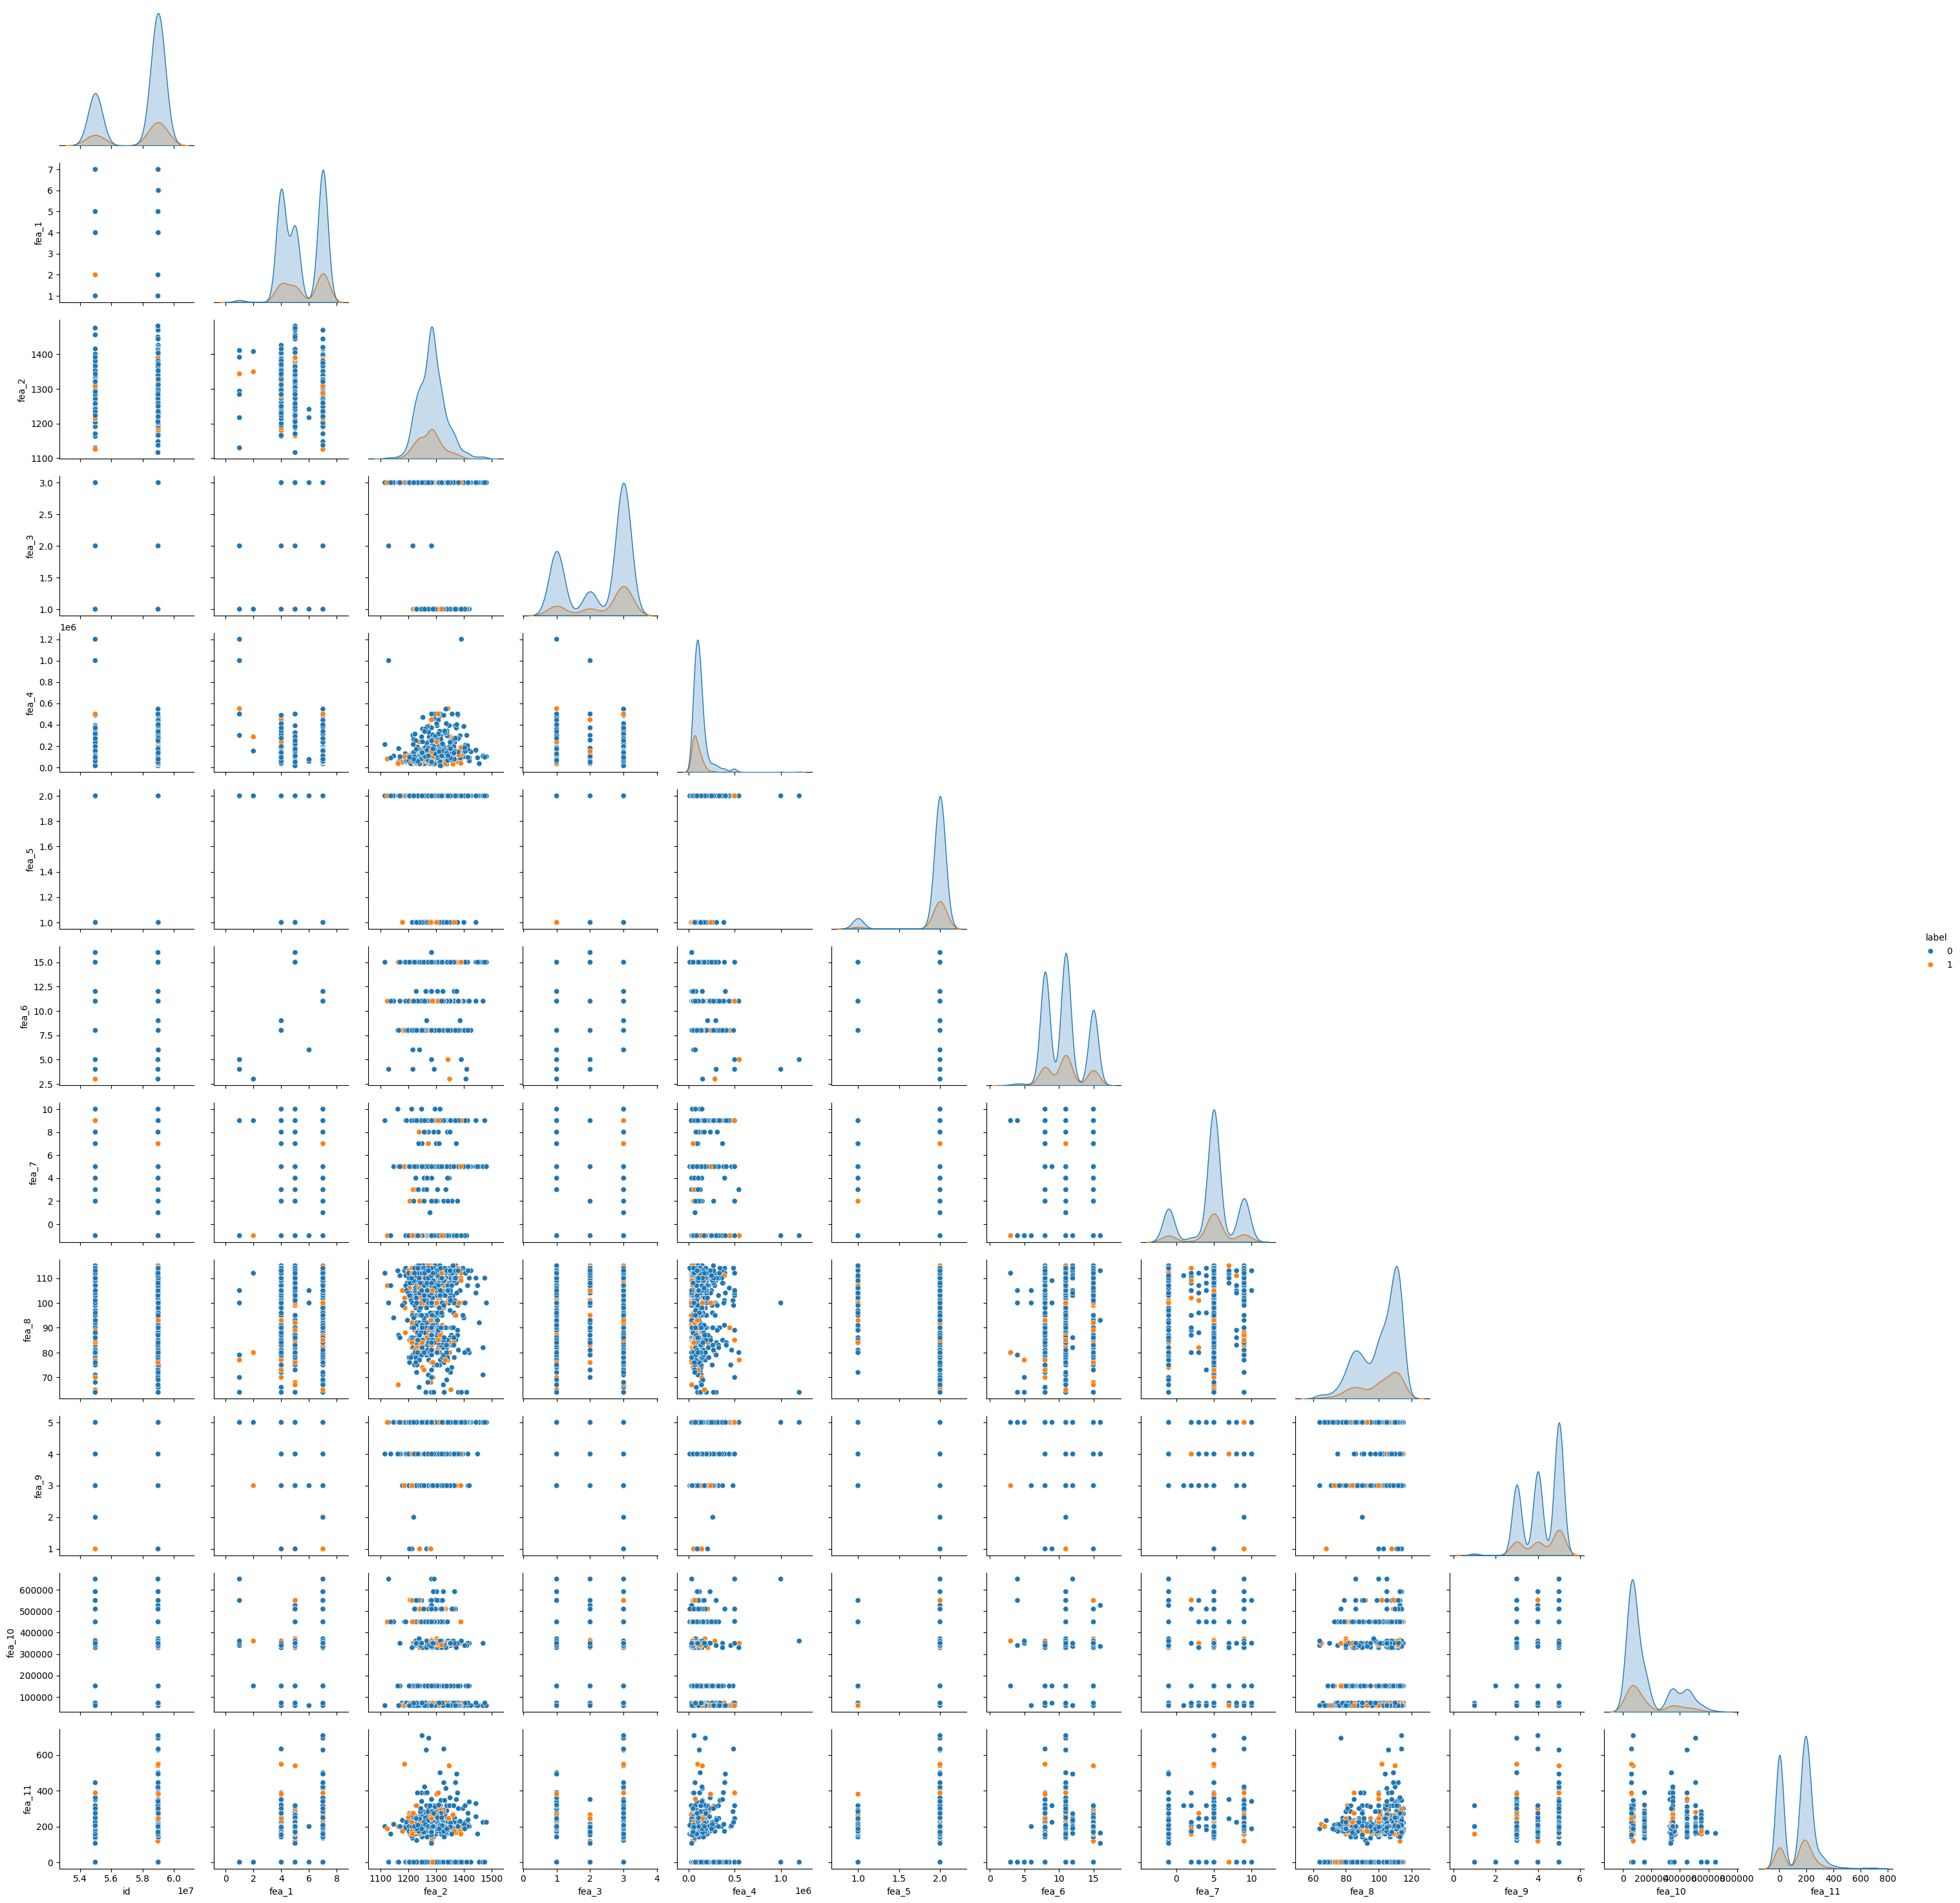

In [ ]:
import seaborn
import matplotlib.pyplot as plt

seaborn.pairplot(df, hue='label', corner=True)
plt.show()

<Axes: >

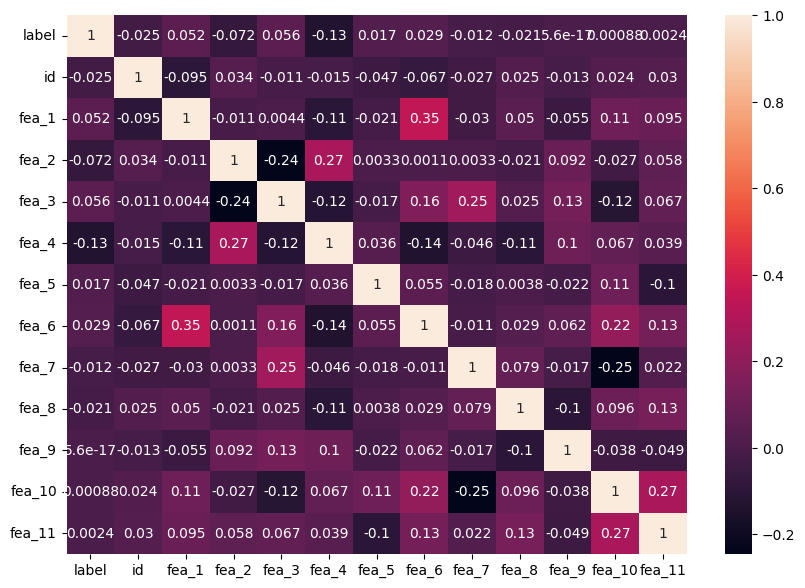

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)

In [ ]:
X = df.drop(columns=['label'])

In [ ]:
Y = df['label']


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
mm = MinMaxScaler()
mm.fit(x_train)

MinMaxScaler()

In [ ]:
nrm_xtrain = mm.transform(x_train)

In [ ]:
nrm_xtest = mm.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(nrm_xtrain, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr.predict(nrm_xtest))

0.8047337278106509

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(nrm_xtrain, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, dt.predict(nrm_xtest))

0.6952662721893491

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(nrm_xtrain, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, rf.predict(nrm_xtest))

0.7988165680473372

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#hyper parameter tuning

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

skf = StratifiedKFold(n_splits = 5)

hyper_params = {'LR__penalty':['l1','l2','elasticnet','none'],
                'LR__C':np.linspace(1, 10, 10),
                'LR__l1_ratio':np.linspace(0.001,0.9999, 5),
               }


from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

mysteps = [('mm',MinMaxScaler()), ('LR',LogisticRegression(random_state=1, solver = 'saga', max_iter = 1000, tol = 0.00))]

m_pipe = Pipeline(steps = mysteps)

rcv = RandomizedSearchCV(m_pipe, param_distributions = hyper_params, cv = skf, scoring = 'accuracy')

rcv.fit(X, Y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('mm', MinMaxScaler()),
                                             ('LR',
                                              LogisticRegression(max_iter=1000,
                                                                 random_state=1,
                                                                 solver='saga',
                                                                 tol=0.0))]),
                   param_distributions={'LR__C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                                        'LR__l1_ratio': array([0.001   , 0.250725, 0.50045 , 0.750175, 0.9999  ]),
                                        'LR__penalty': ['l1', 'l2',
                                                        'elasticnet', 'none']},
                   scoring='accuracy')

In [ ]:
rcv.best_params_

{'LR__penalty': 'elasticnet', 'LR__l1_ratio': 0.9999, 'LR__C': 4.0}

In [ ]:
rcv.best_score_

0.8

In [ ]:
import xgboost as xgb
xgbc = xgb.XGBClassifier(random_state = 1)
xgbc.fit(nrm_xtrain, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgbcacc = accuracy_score(y_test, xgbc.predict(nrm_xtest))
xgbcacc

0.7603550295857988

In [ ]:
# serialization & deserialization
import joblib
joblib.dump(lr,"my_trained_model_v1.pkl")

['my_trained_model_v1.pkl']

In [ ]:
#deserialization
final_model = joblib.load("my_trained_model_v1.pkl")

In [ ]:
import numpy
numpy.__version__

'1.25.2'

In [ ]:
import pandas
pandas.__version__

'1.5.3'

In [ ]:
import joblib
joblib.__version__

'1.3.2'

In [ ]:
import sklearn
sklearn.__version__

'1.2.2'

In [ ]:
import scipy
scipy.__version__

'1.11.4'

In [ ]:
import setuptools
setuptools.__version__

'67.7.2'

In [ ]:
import wheel
wheel.__version__

'0.42.0'